In [32]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [33]:
f = lambda x, y: np.exp(-(x*x*y*y+x*x+y*y-8*x-8*y)/2.)

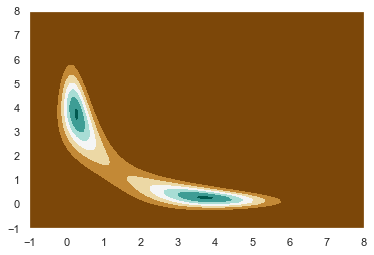

In [35]:
xx = np.linspace(-1, 8, 100)
yy = np.linspace(-1, 8, 100)
xg,yg = np.meshgrid(xx, yy)
z = f(xg.ravel(), yg.ravel())
z2 = z.reshape(xg.shape)
plt.contourf(xg, yg, z2, cmap='BrBG')

In [36]:
N = 50000
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = 1.
y[0] = 6.
sig = lambda z, i: np.sqrt(1./(1.+z[i]*z[i]))
mu = lambda z, i: 4./(1.+z[i]*z[i])

In [37]:
for i in range(1, N, 2):
    sig_x = sig(y, i-1)
    mu_x = mu(y, i-1)
    x[i] = np.random.normal(mu_x, sig_x)
    y[i] = y[i-1]
    
    sig_y = sig(x, i)
    mu_y = mu(x, i)
    y[i+1] = np.random.normal(mu_y, sig_y)
    x[i+1] = x[i]

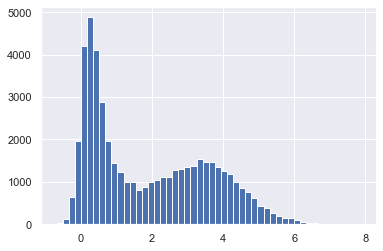

In [38]:
plt.hist(x, bins=50);

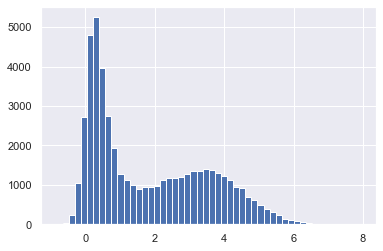

In [39]:
plt.hist(y, bins=50);

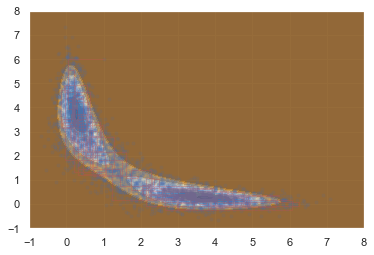

In [40]:
plt.contourf(xg, yg, z2, alpha=0.8, cmap='BrBG')
plt.plot(x[::10],y[::10], '.', alpha=0.1)
plt.plot(x[:300],y[:300], c='r', alpha=0.3, lw=1)